# Malus experience 2
## Done by varying the angle of the two HWP


### Importing modules

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import importlib.util
import sys
import os
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib.collections import PathCollection

from matplotlib.patches import Rectangle
from matplotlib.patches import ConnectionPatch

from scipy.optimize import curve_fit

module_name = "utils_v2"
file_path = "/workspaces/TP3/utils_v2.py"

spec = importlib.util.spec_from_file_location(module_name, file_path)
module = importlib.util.module_from_spec(spec)
sys.modules[module_name] = module
spec.loader.exec_module(module)

# Importer le module
import utils_v2 as u

import pandas as pd

### Importing Data


In [4]:
degs1 = np.array([0,22,45,67])
degs2 = np.array([11,34,56,79])


datas = np.zeros((len(degs1),len(degs2)))

for i,deg1 in enumerate(degs1) :
    for j,deg2 in enumerate(degs2) :
        data = pd.read_csv("/workspaces/TP3/TP_Intrication-Quantique/Datas/2crystals/spectrum_2crystals_{}_{}.csv".format(deg1,deg2), sep=";",header=0)
        
        delays = np.concatenate([-data.iloc[:,0].to_numpy()[::-1],data.iloc[:,0].to_numpy()]) 
        counts = np.concatenate([data.iloc[:,1].to_numpy()[::-1],data.iloc[:,2].to_numpy()])
        
        max_counts = np.max(counts)
        
        datas[i][j] = max_counts
        
    
    
    


### Process an plot the data

0.6540417962374525
0.7778279861424914


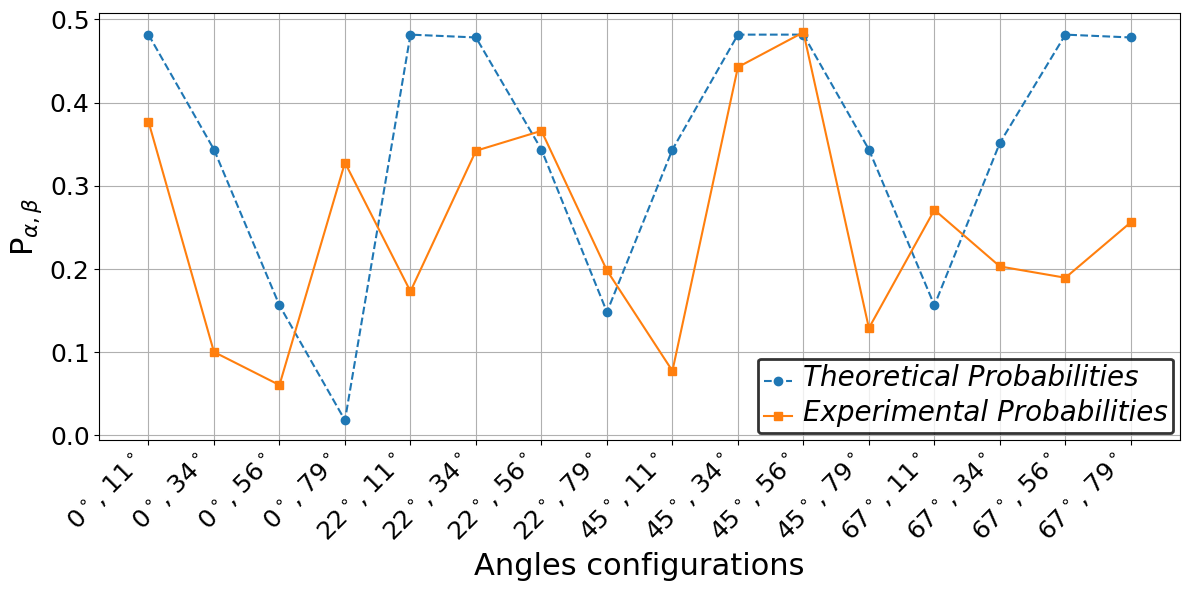

In [28]:

#the function E(alpha,beta) = P_{alpha,beta} + P_{alpha_,beta_} - P_{alpha_,beta} - P_{alpha,beta_}

#alpha beta
E_0_11 = (datas[0,0] + datas[2,2] - datas[0,2] - datas[2,0])/(datas[0,0] + datas[2,2] + datas[0,2] + datas[2,0])

#alphaprime betaprime
E_22_34 = (datas[1,1] + datas[3,3] - datas[1,3] - datas[3,1])/(datas[1,1] + datas[3,3] + datas[1,3] + datas[3,1])

#alpha betaprime
E_0_34 = (datas[0,1] + datas[2,3] - datas[0,3] - datas[2,1])/(datas[0,1] + datas[2,3] + datas[0,3] + datas[2,1])

#alphaprime beta
E_22_11 = (datas[1,0] + datas[3,2] - datas[1,2] - datas[3,0])/(datas[1,0] + datas[3,2] + datas[1,2] + datas[3,0])

E_tot = E_0_11 + E_22_34 + E_0_34 - E_22_11

print(E_tot)

MAX = max(datas[0,0],datas[0,1],datas[0,2],datas[0,3],datas[1,0],datas[1,1],datas[1,2],datas[1,3],datas[2,0],datas[2,1],datas[2,2],datas[2,3],datas[3,0],datas[3,1],datas[3,2],datas[3,3])
MIN = min(datas[0,0],datas[0,1],datas[0,2],datas[0,3],datas[1,0],datas[1,1],datas[1,2],datas[1,3],datas[2,0],datas[2,1],datas[2,2],datas[2,3],datas[3,0],datas[3,1],datas[3,2],datas[3,3])

print((MAX-MIN)/(MAX + MIN))

# Compare experimental probabilities with theoretical ones
theoretical_probs = [
    0.5 * np.cos(np.radians(degs1[0] - degs2[0]))**2,
    0.5 * np.cos(np.radians(degs1[0] - degs2[1]))**2,
    0.5 * np.cos(np.radians(degs1[0] - degs2[2]))**2,
    0.5 * np.cos(np.radians(degs1[0] - degs2[3]))**2,
    0.5 * np.cos(np.radians(degs1[1] - degs2[0]))**2,
    0.5 * np.cos(np.radians(degs1[1] - degs2[1]))**2,
    0.5 * np.cos(np.radians(degs1[1] - degs2[2]))**2,
    0.5 * np.cos(np.radians(degs1[1] - degs2[3]))**2,
    0.5 * np.cos(np.radians(degs1[2] - degs2[0]))**2,
    0.5 * np.cos(np.radians(degs1[2] - degs2[1]))**2,
    0.5 * np.cos(np.radians(degs1[2] - degs2[2]))**2,
    0.5 * np.cos(np.radians(degs1[2] - degs2[3]))**2,
    0.5 * np.cos(np.radians(degs1[3] - degs2[0]))**2,
    0.5 * np.cos(np.radians(degs1[3] - degs2[1]))**2,
    0.5 * np.cos(np.radians(degs1[3] - degs2[2]))**2,
    0.5 * np.cos(np.radians(degs1[3] - degs2[3]))**2
]

experimental_probs = [
    datas[0, 0] / (datas[0, 0] + datas[2, 2] + datas[0, 2] + datas[2, 0]),
    datas[0, 1] / (datas[0, 1] + datas[2, 3] + datas[0, 3] + datas[2, 1]),
    datas[0, 2] / (datas[0, 2] + datas[2, 0] + datas[0, 0] + datas[2, 2]),
    datas[0, 3] / (datas[0, 3] + datas[2, 1] + datas[0, 1] + datas[2, 3]),
    datas[1, 0] / (datas[1, 0] + datas[3, 2] + datas[1, 2] + datas[3, 0]),
    datas[1, 1] / (datas[1, 1] + datas[3, 3] + datas[1, 3] + datas[3, 1]),
    datas[1, 2] / (datas[1, 2] + datas[3, 0] + datas[1, 0] + datas[3, 2]),
    datas[1, 3] / (datas[1, 3] + datas[3, 1] + datas[1, 1] + datas[3, 3]),
    datas[2, 0] / (datas[2, 0] + datas[0, 2] + datas[2, 2] + datas[0, 0]),
    datas[2, 1] / (datas[2, 1] + datas[0, 3] + datas[2, 3] + datas[0, 1]),
    datas[2, 2] / (datas[2, 2] + datas[0, 0] + datas[2, 0] + datas[0, 2]),
    datas[2, 3] / (datas[2, 3] + datas[0, 1] + datas[2, 1] + datas[0, 3]),
    datas[3, 0] / (datas[3, 0] + datas[1, 2] + datas[3, 2] + datas[1, 0]),
    datas[3, 1] / (datas[3, 1] + datas[1, 3] + datas[3, 3] + datas[1, 1]),
    datas[3, 2] / (datas[3, 2] + datas[1, 0] + datas[3, 0] + datas[1, 2]),
    datas[3, 3] / (datas[3, 3] + datas[1, 1] + datas[3, 1] + datas[1, 3])
]


xlabel ="Angles configurations"
ylabel = r"P$_{\alpha,\beta}$"

ax,fig = u.create_figure_and_apply_format((12,6),xlabel=xlabel, ylabel=ylabel)


# Plot the comparison between theoretical and experimental probabilities
alphas = [0, 22, 45, 67]
betas = [11, 34, 56, 79]

# Plot theoretical probabilities
ax.plot(theoretical_probs, label="Theoretical Probabilities", marker='o', linestyle='--')

# Plot experimental probabilities
ax.plot(experimental_probs, label="Experimental Probabilities", marker='s', linestyle='-')
# Set x-ticks with exact configurations
configurations = [fr"{alphas[i//4]}$^\circ$, {betas[i%4]}$^\circ$" for i in range(len(theoretical_probs))]
ax.set_xticks(range(len(configurations)))
ax.set_xticklabels(configurations, rotation=45, ha='right')

u.set_legend_properties(ax)
plt.show()

fig.savefig("/workspaces/TP3/TP_Intrication-Quantique/Rapport/Figures/Probabilités.pdf")

fig.savefig("/workspaces/TP3/TP_Intrication-Quantique/Rapport/Figures/Probabilités.png")

